C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

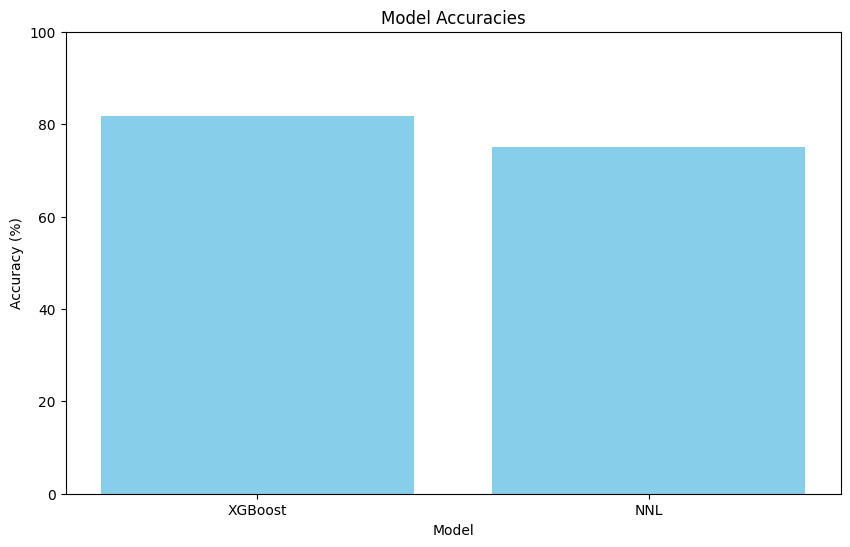

C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

     Model  Accuracy (%)
0  XGBoost     81.666667
1      NNL     75.000000


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb  # Import XGBoost library

data = pd.read_csv("G:\dataset (1).csv")

# Rename columns
data.rename(columns={'Nacionality': 'Nationality', 'Age at enrollment': 'Age'}, inplace=True)

# Slice the dataset to include rows from 100 to 400
new_data = data.iloc[3000:3300].copy()

# Drop unnecessary columns
new_data.drop(columns=['Nationality', 'Mother\'s qualification', 'Father\'s qualification',
                       'Educational special needs', 'International', 'Curricular units 1st sem (without evaluations)',
                       'Unemployment rate', 'Inflation rate'], axis=1, inplace=True)

# Map target values
new_data['Target'] = new_data['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

# Split the data into features (X) and target variable (y)
X = new_data.drop('Target', axis=1)
y = new_data['Target']

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


dtree = DecisionTreeClassifier(random_state=0)
xgb_model = xgb.XGBClassifier(random_state=0)  # Initialize XGBoost classifier

# Fit the models
dtree.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)  # Fit XGBoost


y_pred_dtree = dtree.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)  # Predict with XGBoost


accuracy_dtree = accuracy_score(y_test, y_pred_dtree) * 100
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100  # Calculate XGBoost accuracy


model_names = ['XGBoost', 'NNL']  # Update model names
accuracy_values = [accuracy_dtree, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100)
plt.show()


ens_soft = VotingClassifier(estimators=[('dtree', dtree), ('xgb', xgb_model)], voting='soft')
ens_hard = VotingClassifier(estimators=[('dtree', dtree), ('xgb', xgb_model)], voting='hard')

ens_soft.fit(X_train, y_train)
ens_hard.fit(X_train, y_train)

y_pred_soft = ens_soft.predict(X_test)
y_pred_hard = ens_hard.predict(X_test)

# Print ensemble accuracies
accuracy_ens_soft = accuracy_score(y_test, y_pred_soft) * 100
accuracy_ens_hard = accuracy_score(y_test, y_pred_hard) * 100

# Create a DataFrame to display the accuracy differences
accuracy_data = {
    'Model': ['XGBoost', 'NNL'],  # Update model names
    'Accuracy (%)': [accuracy_dtree, accuracy_xgb]
}

accuracy_df = pd.DataFrame(accuracy_data)

print(accuracy_df)
